In [13]:
!conda install numba

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [14]:
!pip install quantized

In [15]:
from quantized.basis import HarmonicOscillator, EigenBasis
basis_set = (
    [HarmonicOscillator(n, center=1.0) for n in range(5)]
    + [HarmonicOscillator(n, center=-1.0) for n in range(5)]
)
basis_set

[HarmonicOscillator(n=0, center=1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=1, center=1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=2, center=1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=3, center=1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=4, center=1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=0, center=-1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=1, center=-1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=2, center=-1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=3, center=-1.0, mass=1.0, omega=1.0),
 HarmonicOscillator(n=4, center=-1.0, mass=1.0, omega=1.0)]

In [16]:
from functools import partial
from quantized import operators

def potential(x, a, b):
    return a * x ** 4 - b * x**2


v = partial(potential, a=1.0, b=1.0) # x^4 - x^2

H = operators.Hamiltonian(v).matrix(basis_set)
S = operators.Overlap().matrix(basis_set)

eig_basis = EigenBasis.from_basis(basis_set, H, S)

print("Ground state", eig_basis.states[0])
print("\nEnergies:", eig_basis.energies)

Ground state -0.7902 * HarmonicOscillator(n=0, center=1.0, mass=1.0, omega=1.0)
 + 0.0541 * HarmonicOscillator(n=1, center=1.0, mass=1.0, omega=1.0)
 + 0.3992 * HarmonicOscillator(n=2, center=1.0, mass=1.0, omega=1.0)
 + -0.3140 * HarmonicOscillator(n=3, center=1.0, mass=1.0, omega=1.0)
 + 0.0895 * HarmonicOscillator(n=4, center=1.0, mass=1.0, omega=1.0)
 + -0.7902 * HarmonicOscillator(n=0, center=-1.0, mass=1.0, omega=1.0)
 + -0.0541 * HarmonicOscillator(n=1, center=-1.0, mass=1.0, omega=1.0)
 + 0.3992 * HarmonicOscillator(n=2, center=-1.0, mass=1.0, omega=1.0)
 + 0.3140 * HarmonicOscillator(n=3, center=-1.0, mass=1.0, omega=1.0)
 + 0.0895 * HarmonicOscillator(n=4, center=-1.0, mass=1.0, omega=1.0)

Energies: (0.34609765219080335, 1.6327259575152493, 3.7719654058954255, 6.679229147799376, 14.62403585929429, 23.186524146139345, 54.60888164760587, 75.405523449756, 177.5525812680957, 221.1070165756367)


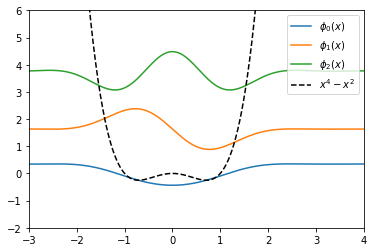

In [17]:
from matplotlib.pyplot import subplots
import numpy as np
fig, ax = subplots()
x = np.linspace(-5, 5, 1000)

for i, (b, e) in enumerate(zip(eig_basis.states[:3], eig_basis.energies[:3])):
    ax.plot(x, b(x) + e, label=f"$\phi_{i}(x)$")

ax.plot(x, v(x), "k--", label="$x^4-x^2$")
ax.legend(loc="upper right")
ax.set_xlim(-3, 4)
_ = ax.set_ylim(-2, 6)

Ground state 0.2831 * HarmonicOscillator(n=0, center=1.0, mass=1.0, omega=1.0)
 + -0.3647 * HarmonicOscillator(n=1, center=1.0, mass=1.0, omega=1.0)
 + 0.2346 * HarmonicOscillator(n=2, center=1.0, mass=1.0, omega=1.0)
 + -0.0867 * HarmonicOscillator(n=3, center=1.0, mass=1.0, omega=1.0)
 + 0.0157 * HarmonicOscillator(n=4, center=1.0, mass=1.0, omega=1.0)
 + 0.2831 * HarmonicOscillator(n=0, center=-1.0, mass=1.0, omega=1.0)
 + 0.3647 * HarmonicOscillator(n=1, center=-1.0, mass=1.0, omega=1.0)
 + 0.2346 * HarmonicOscillator(n=2, center=-1.0, mass=1.0, omega=1.0)
 + 0.0867 * HarmonicOscillator(n=3, center=-1.0, mass=1.0, omega=1.0)
 + 0.0157 * HarmonicOscillator(n=4, center=-1.0, mass=1.0, omega=1.0)

Energies: (0.7071087270097992, 2.1213299335215487, 3.536504886416165, 4.951802387846327, 6.414127807690924, 7.851577275573678, 9.771259690695853, 11.301224308952477, 14.779408098328565, 16.444485374194922)


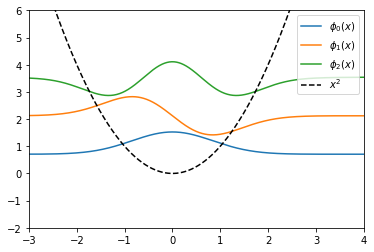

In [18]:
# V(x) = x^2

from functools import partial
from quantized import operators
from matplotlib.pyplot import subplots
import numpy as np
fig, ax = subplots()
x = np.linspace(-5, 5, 1000)


def potential(x, a, b):
    return a * x ** 4 - b * x**2


v = partial(potential, a=0.0, b=-1.0) # x^2

H = operators.Hamiltonian(v).matrix(basis_set)
S = operators.Overlap().matrix(basis_set)

eig_basis = EigenBasis.from_basis(basis_set, H, S)

print("Ground state", eig_basis.states[0])
print("\nEnergies:", eig_basis.energies)


for i, (b, e) in enumerate(zip(eig_basis.states[:3], eig_basis.energies[:3])):
    ax.plot(x, b(x) + e, label=f"$\phi_{i}(x)$")

ax.plot(x, v(x), "k--", label="$x^2$")
ax.legend(loc="upper right")
ax.set_xlim(-3, 4)
_ = ax.set_ylim(-2, 6)